## Importing the libraries

In [1]:
## The required libraries
import numpy as np
import pandas as pd
import plotly.express as px

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

palette = sns.color_palette("rainbow", 8)
%matplotlib inline

## Background and Context
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective
- Analysis of the data to provide greater overview about what makes customers churn, and how to identify those customers, so we can take steps to reduce it.


## Feature Description
- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer
- CreditScore: It defines the credit history of the customer.
- Geography: A customer’s location
- Gender: It defines the Gender of the customer
- Age: Age of the customer
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 0=No ( Customer did not leave the bank ) 1=Yes ( Customer left the bank )

## Load the dataset

In [2]:
## Lets import the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\data\Bank_Chunk_Prediction_1\Data\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


## Understanding the dataset

In [3]:
# I want to check the number of missing values from the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

#### Data Shape

In [4]:
# I want to check the shape of the datset
df.shape

(10002, 14)

### Comment:
The dataset has 100002 rows with 14 attributes.

#### Check For unique Data

In [5]:
# Lets get the unique count for each variables
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


##  Observation:
1. RowNumber looks like record tracking number and can be ignored. We have already considered the same as rownum variable in our dataframe and there is no need to handle the same.
2. CustomerID is unique appears to be unique to every customer and would not add any value in our analysis. We can drop the same.
3. Surname is a demographic information and doesn't really add value in identifying if the customer will continue with the bank.
4. Geography variable contains the name of the Country where customer resides / belongs to. This information can add value to analysis and identify if the Country has any influence on customer behavior. However we can do one hot encoding of the variable.
5. Exited is the target column and contains numerical data. We can use the same without any processing or handling.
6. All other variables look OK.

## Drop the RowNumber, CustomerID and Surname columns

In [7]:
# Drop the column as explained above
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [8]:
# Lets review the numbers of row and see whats left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [9]:
# Check the variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# Lets set some variables to object

df['NumOfProducts'] = df['NumOfProducts'].astype('object')
df['HasCrCard'] = df['HasCrCard'].astype('object')
df['IsActiveMember'] = df['IsActiveMember'].astype('object')
df['Tenure'] = df['Tenure'].astype('object')

## Lets divide the categorical and numerical variables

In [11]:
# Lets first select the categorical variables
cat_var = [col for col in df.columns if df[col].dtypes == 'object']

# Lets select the numerical variables
num_var = df.select_dtypes(np.number).columns.to_list()[:-1]

# Null Values

In [12]:
# Before we proceed , lets take care of the nan values
df.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# I want to replace the null values with the median of the distribution
# We will now fill it the null values
null_values = ['Geography', 'Age', 'HasCrCard', 'IsActiveMember']
for null in null_values:
    df[null].fillna(df[null].mode()[0], inplace = True)

In [14]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


# Explanatory Data Analysis

## Univariate Analysis

## Lets first see the proportion of the customer that Exited.

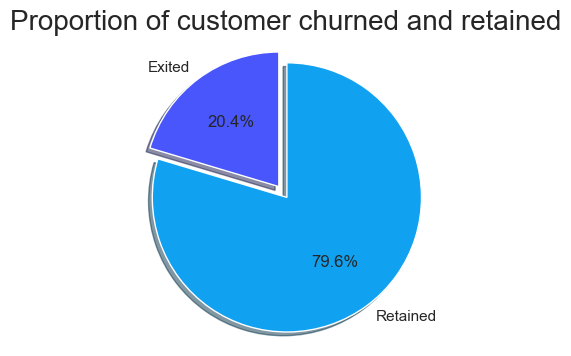

In [16]:
labels = ['Exited', 'Retained']


sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)

plt.show()

## Comment:
- The chart above shows that about about 20.4% of the customers have left the bank within the last 6 months, while 79.6% customers are still retained.
- This 20.4% Makes this dataset unbalaned
- So the baseline model could be to predict that 20.4% of the customers will churn. Given 20.4% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20.4% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

## Proportion Of Geography

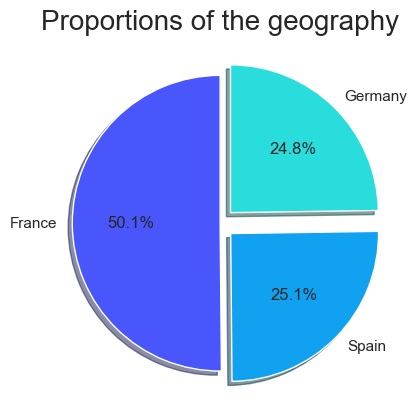

In [17]:
# To check for the geography

# Lets the pie chart of the proportion
labels = ['France', 'Spain', 'Germany']
explode = (0, 0.1, 0.1)
plt.pie(df["Geography"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportions of the geography", size = 20)
plt.show()

## Observation:
Majority of customers are from France, about 50.1%, and about 24.8% from Germany and 25.1% from Spain.

## Gender

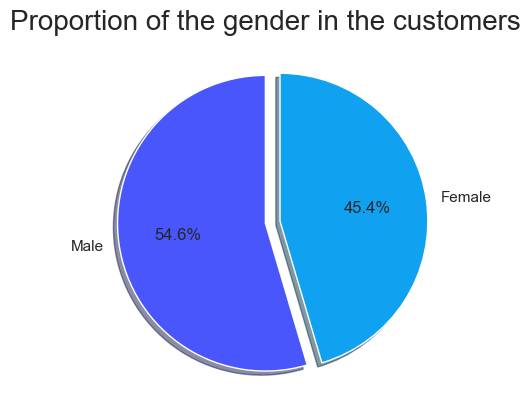

In [18]:
# Lets the pie chart of the proportion
labels = ['Male', 'Female']
explode = (0, 0.1)
plt.pie(df.Gender.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportion of the gender in the customers", size = 20)
plt.show()

## Observation:
In our data sample there are more males than females.About 54.6% male and 45.4% Female

## Tenure

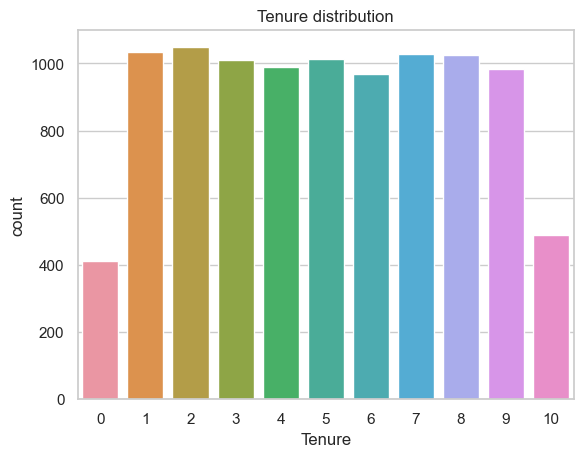

In [19]:
sns.countplot(data = df, x = 'Tenure')
plt.title("Tenure distribution")
plt.show()

## Observations:
- Few records have tenure less than 1 year, this is possibly due to new customers.
- Data also shows that there are around 5% customers that are associated with Bank for 10 years or more.

In [20]:
# # plt.pie(df['Tenure'].value_counts())

# labels = ['2 Years', '1 Year', '8 Years', '7 Years', '4 Years', '6 Years',
#           '3 Years', '10 Years', '3 Years', '9 Years', '0 Year']
# explode = (0.1, 0, 0.1, 0, 0.1, 0, 0, 0.1, 0, 0.1, 0)

# plt.figure(figsize = (8, 8))
# plt.pie(df['Tenure'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90, colors = palette)
# plt.title("Proportion of the gender in the customers", size = 10)
# plt.show()

## Age

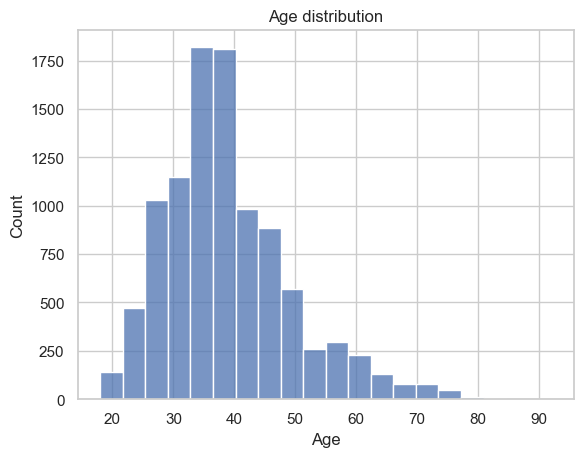

In [21]:
sns.histplot(data = df, x = 'Age', bins = 20)
plt.title("Age distribution")
plt.show()

## Observation
1. Most Number of customer are around 30 to 39
2. Age shows a right tail, which means there are customers older than 60 years of age.
3. Considering the domain this data looks ok and be used as is.

## Credit Score

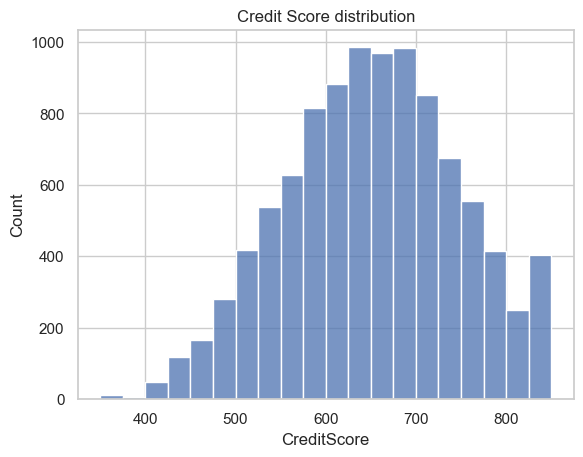

In [22]:
sns.histplot(data = df, x = 'CreditScore', bins = 20)
plt.title("Credit Score distribution")
plt.show()

## Observations
- CreditScore shows a nearly normal distribution with few outliers on the left. This means some customers have less credit score.
- Considering the domain the data looks legitimate and can be used as is without outliers treatment.

## Is an Active member

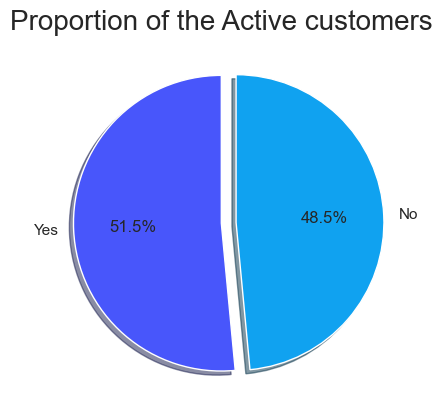

In [23]:
# Lets the pie chart of the proportion
labels = ['Yes', 'No']
explode = (0, 0.1)
plt.pie(df.IsActiveMember.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportion of the Active customers", size = 20)
plt.show()

## Observations:

More than 50% customers are active and use bank products regularly

# Bivariate Analysis

### Are those that are active have credit card ?

In [24]:
# Creating a groupby for those that has credit card 
ind = df.groupby('HasCrCard')['IsActiveMember'].sum().sort_values().index
credit_active = df.groupby('HasCrCard')['IsActiveMember'].sum()

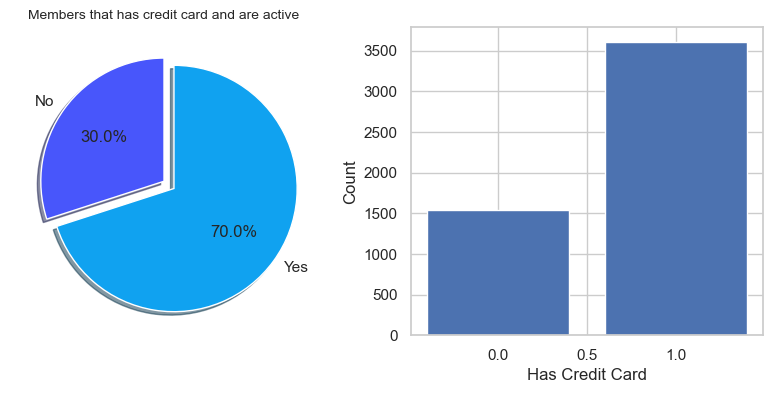

In [25]:
# Lets create a pie chart
labels = ['No', 'Yes']
explode = (0, 0.1)
fig = plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.pie(credit_active, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Members that has credit card and are active", size = 10)

# Lets also create a bar plot
plt.subplot(1, 2, 2)
plt.bar(ind, credit_active)
plt.xlabel('Has Credit Card')
plt.ylabel('Count')

plt.show()

# Observation

Mostly 70% of those that are active has credit card

<Axes: xlabel='IsActiveMember', ylabel='count'>

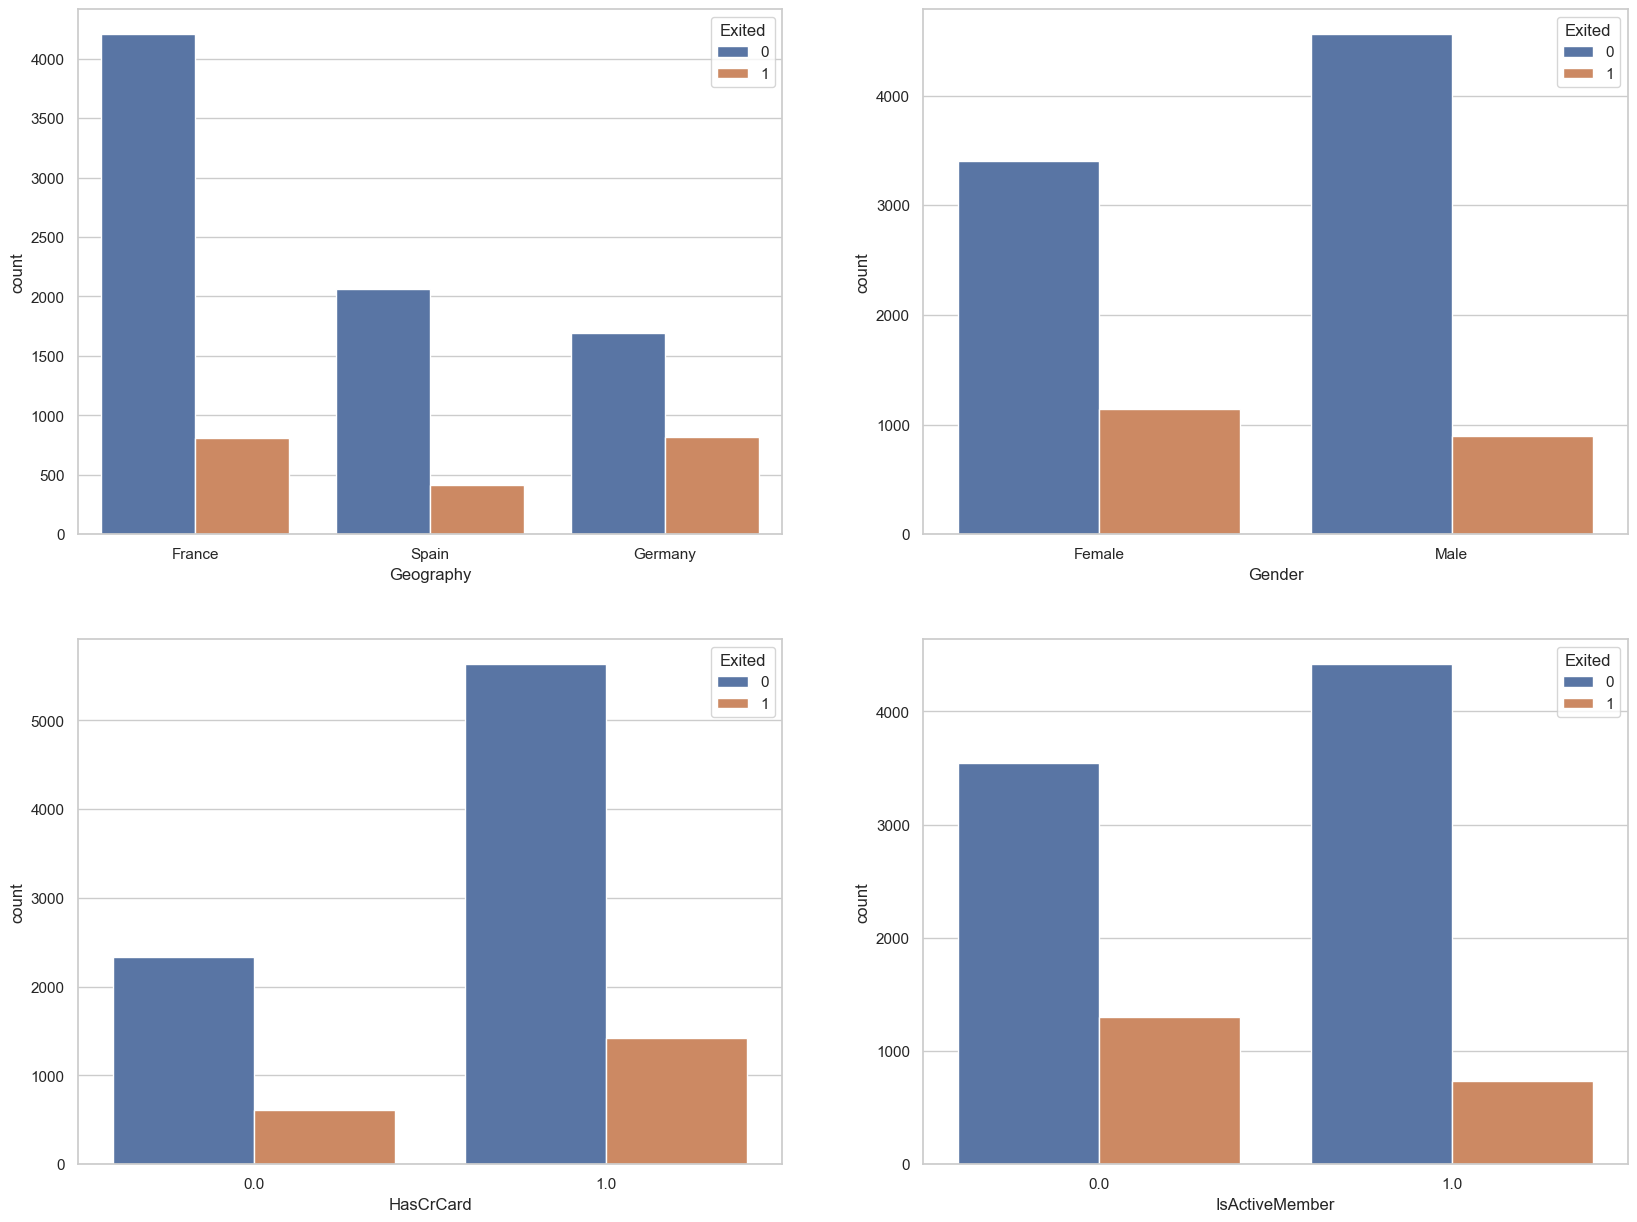

In [26]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

## Observations
1. Customer from Germany are more likely to leave the bank compared to other countries.

# Boxplot

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

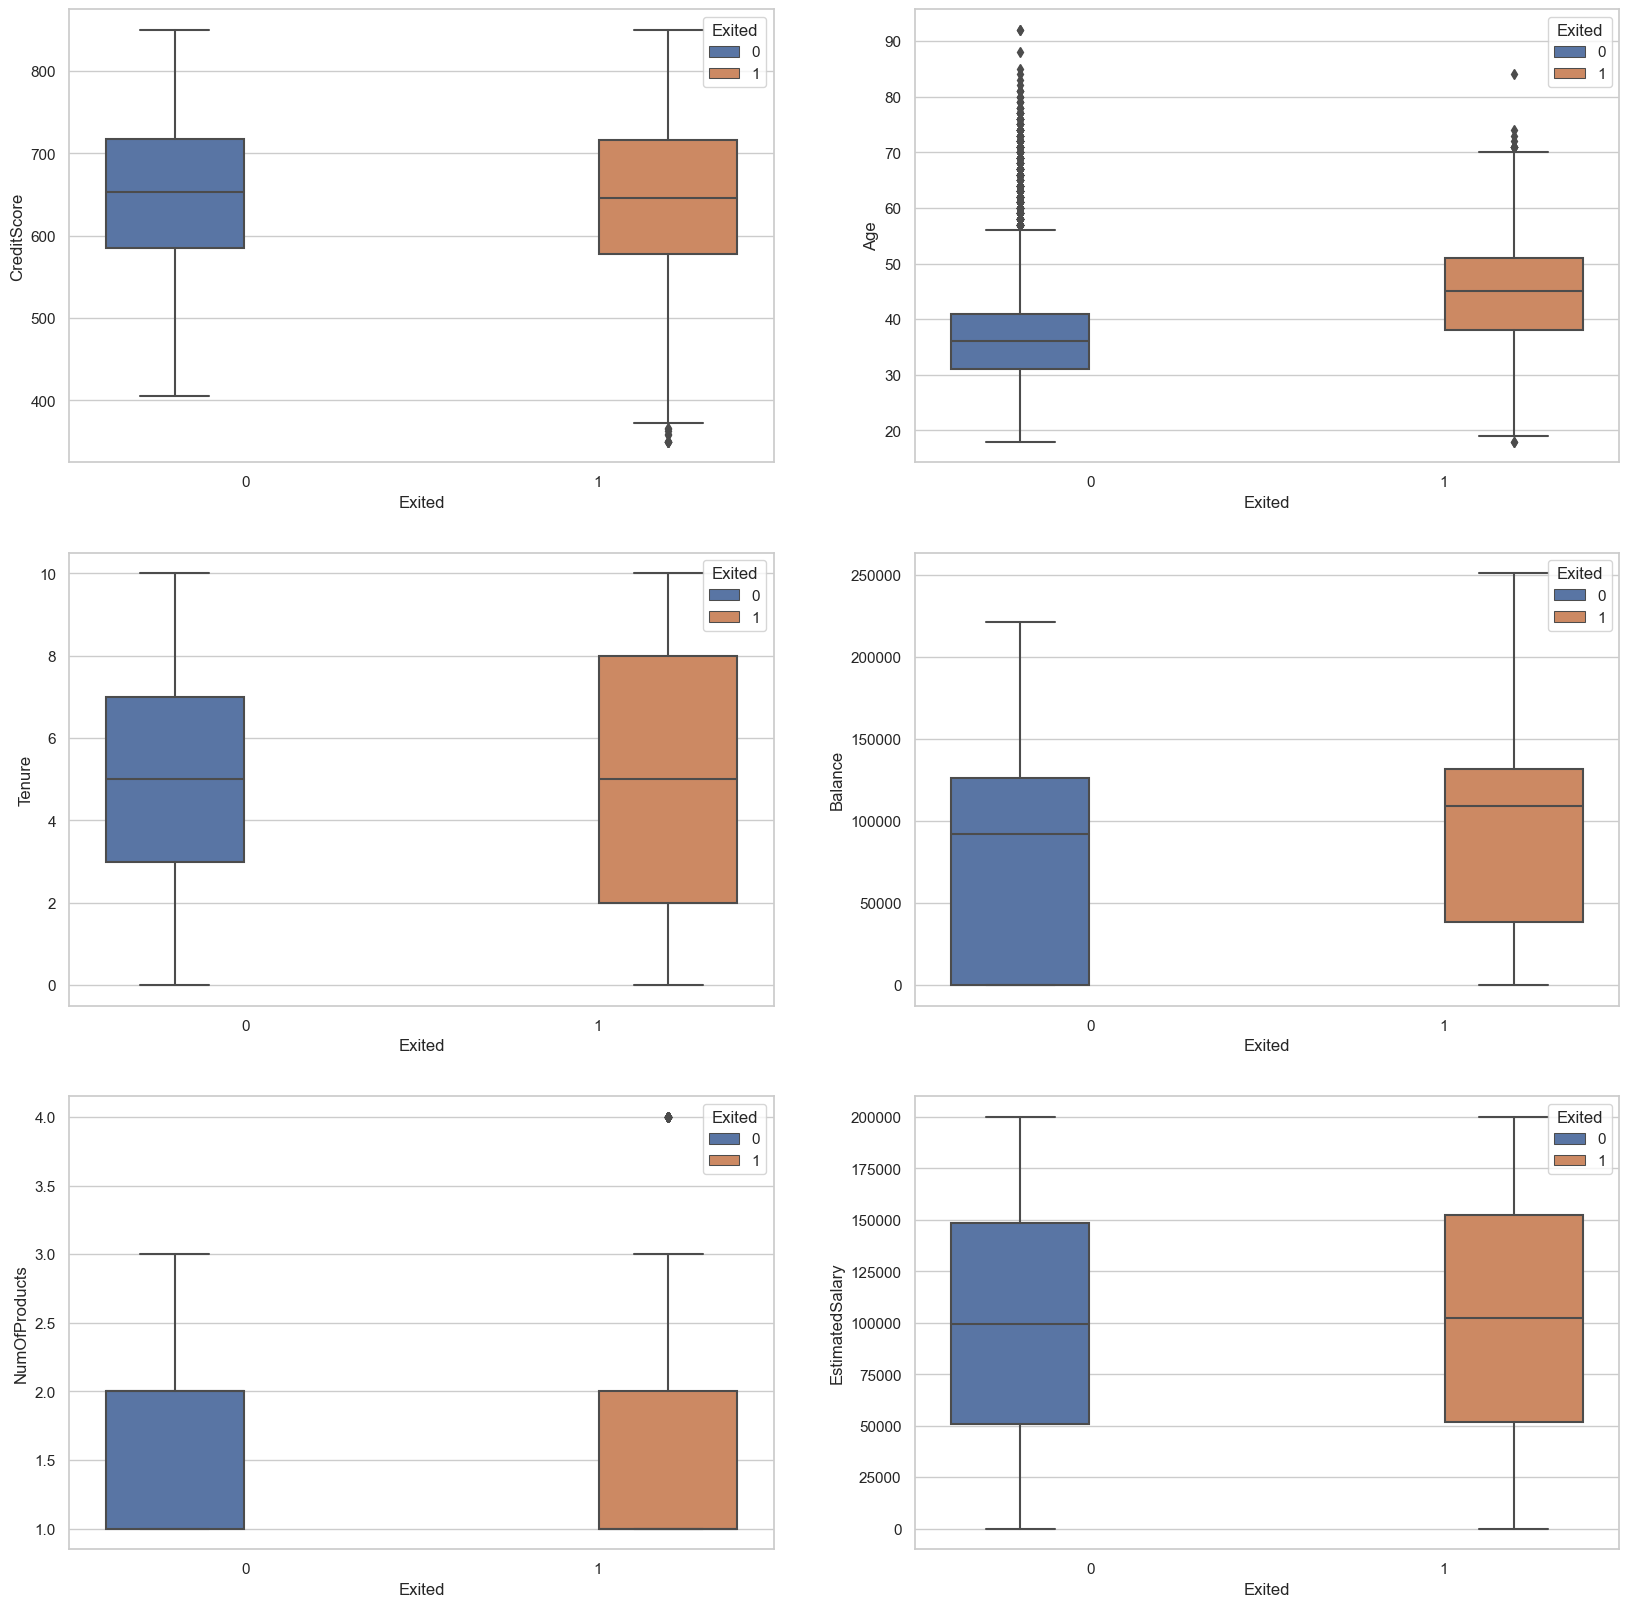

In [27]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 20))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

## Observations
1. There is no significant difference in the credit score distribution between retained and churned customers.
2. The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
3. With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
4. Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
5. Neither the product nor the salary has a significant effect on the likelihood to churn

# Lets Look At The People That Exited (or Churned) As  A Whole

- The reason for doing this is that the data the people that churned is small compared to the whole dataset.
- Check the exited people as a whole to see how the distributions and proportions go.

In [28]:
# Lets see those that left
df_exited = df[df['Exited'] == 1]
df_exited

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
16,653,Germany,Male,58.0,1,132602.88,1,1.0,0.0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9982,655,Germany,Female,46.0,7,137145.12,1,1.0,0.0,115146.40,1
9991,597,France,Female,53.0,4,88381.21,1,1.0,0.0,69384.71,1
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


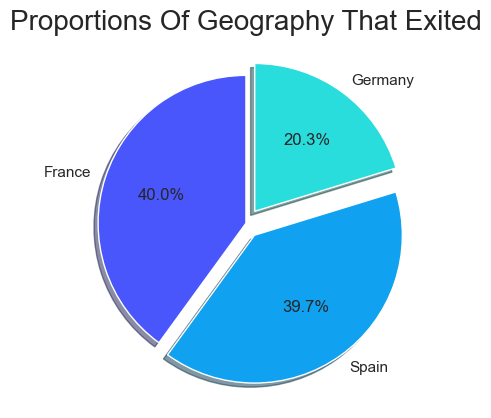

In [29]:
# To check for the geography

# Lets the pie chart of the proportion
labels = ['France', 'Spain', 'Germany']
explode = (0, 0.1, 0.1)
plt.pie(df_exited["Geography"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportions Of Geography That Exited", size = 20)
plt.show()

# Observations:

- Majority of thse that churned are from France, and the least is Germany.
- About 40.0% of the customers that churned are From france, 39.7% are from spain while 20.3% are from Germany

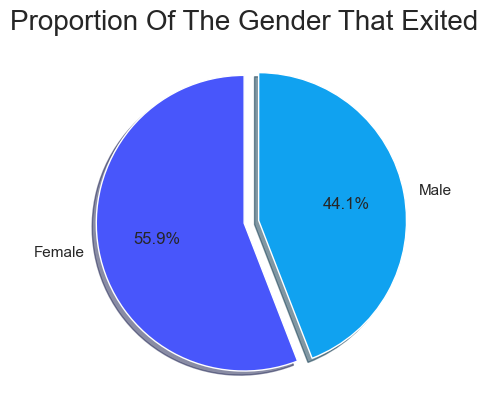

In [30]:
# Lets the pie chart of the proportion
labels = ['Female', 'Male']
explode = (0, 0.1)
plt.pie(df_exited.Gender.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportion Of The Gender That Exited", size = 20)
plt.show()

# Observation(s)
- Most of the customers that churned are female. About 55.9% are female and 44.1% are male

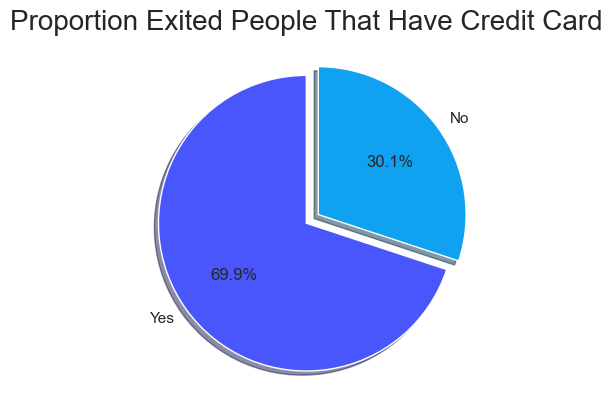

In [31]:
# Lets the pie chart of the proportion
labels = ['Yes', 'No']
explode = (0, 0.1)
plt.pie(df_exited.HasCrCard.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportion Exited People That Have Credit Card", size = 20)
plt.show()

# Observations
- We can see that larger amount of customers having credit card churned.
-  the customer may stop using the product or service because their card expires, is lost or stolen, reaches its credit limit, and lot other reasons.

# Lets see if there is any bias in the purchase of a credit card

In [32]:
ind = df_exited.groupby('HasCrCard')['Gender'].sum().sort_values().index
credit_gender = df_exited.groupby('HasCrCard')['Gender'].value_counts()

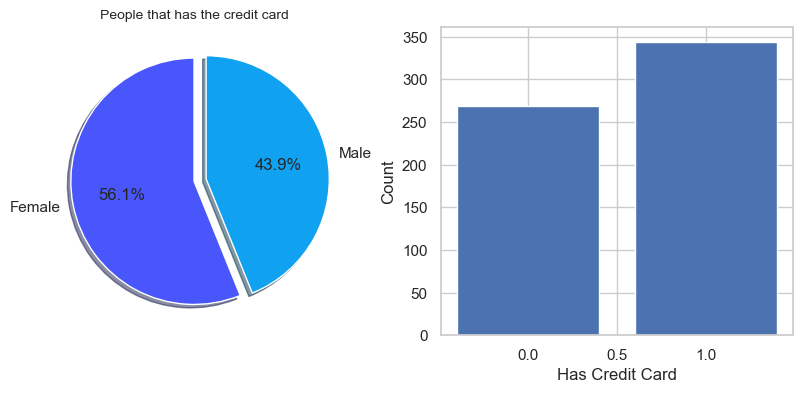

In [33]:
# Lets create a pie chart
labels = ['Female', 'Male']
explode = (0, 0.1)
fig = plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.pie(credit_gender[0], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("People that has the credit card", size = 10)

# Lets also create a bar plot
plt.subplot(1, 2, 2)
plt.bar(ind, credit_gender[0])
plt.xlabel('Has Credit Card')
plt.ylabel('Count')

plt.show()

# Observations:
- About 56.1% of people that doesn' credit card and has left are female.
- This may be due to many reasons. 
- This may be due to bias in the purchase of the card.

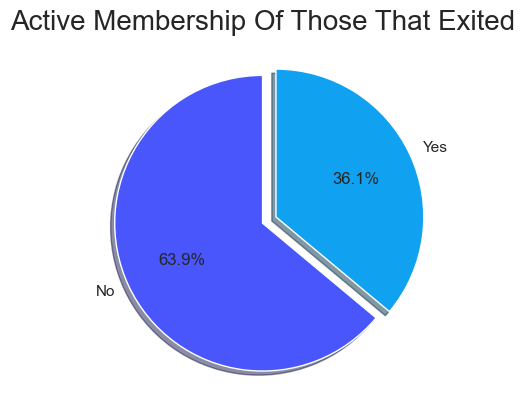

In [34]:
# Lets the pie chart of the proportion
labels = ['No', 'Yes']
explode = (0, 0.1)
plt.pie(df_exited.IsActiveMember.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Active Membership Of Those That Exited", size = 20)
plt.show()

# Observation
- We can see that mainly those that exited are not active. this may be due to many other reasons.

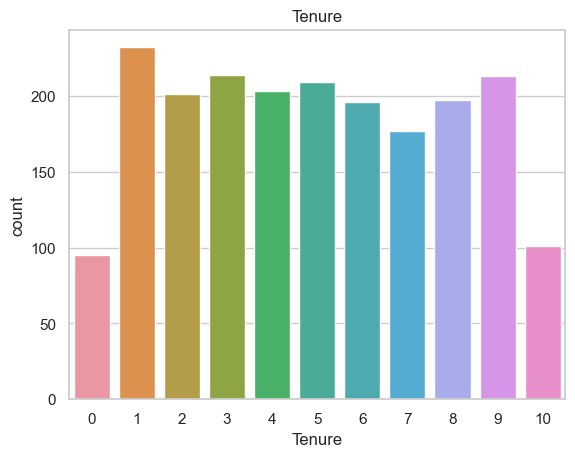

In [35]:
sns.countplot(data = df_exited, x = 'Tenure')
plt.title("Tenure")
plt.show()

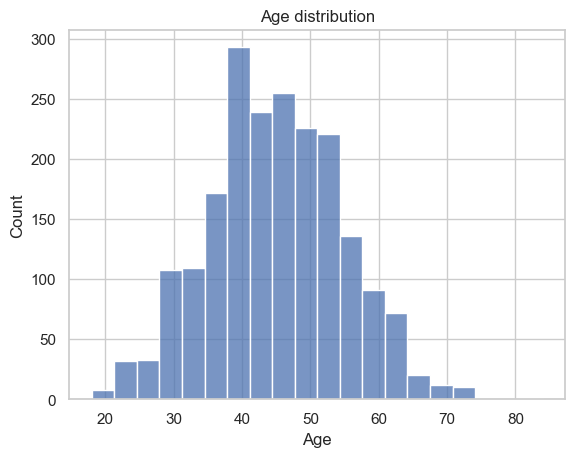

In [36]:
sns.histplot(data = df_exited, x = 'Age', bins = 20)
plt.title("Age distribution")
plt.show()

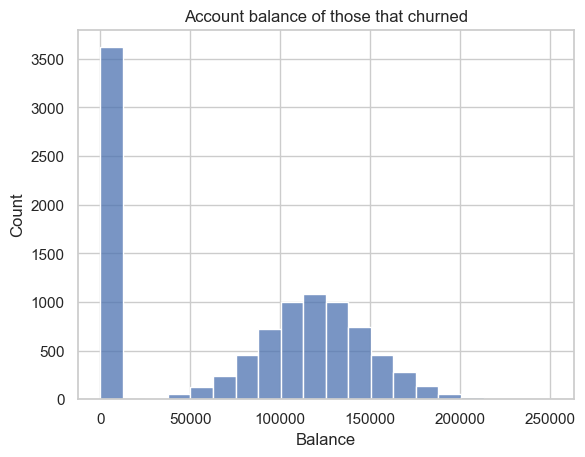

In [37]:
sns.histplot(data = df, x = 'Balance', bins = 20)
plt.title("Account balance of those that churned")
plt.show()

# Observations
- We can see that mainly those that exited do not have any money in their account.

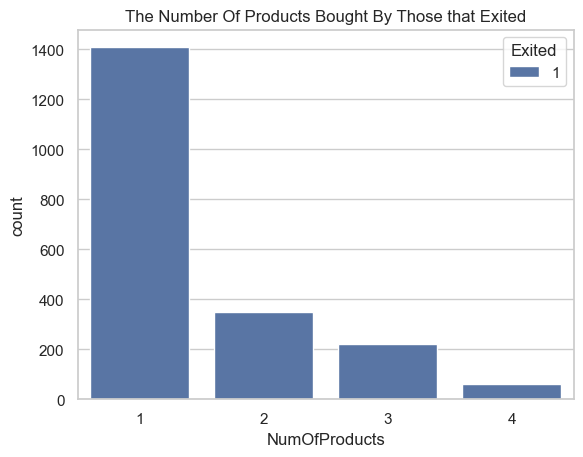

In [38]:
sns.countplot(data = df_exited, x = 'NumOfProducts', hue = 'Exited')
plt.title("The Number Of Products Bought By Those that Exited")
plt.show()

# Observation
- We can see that most of those customers that left do not purchase much product.

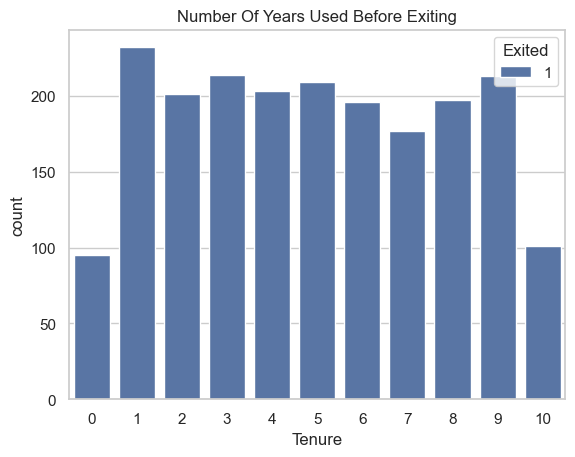

In [39]:
px.bar(df_exited, x='Tenure', color= 'Exited', title = "Number of each gender", width = 600)

sns.countplot(data = df_exited, x = 'Tenure', hue = 'Exited')
plt.title("Number Of Years Used Before Exiting")
plt.show()

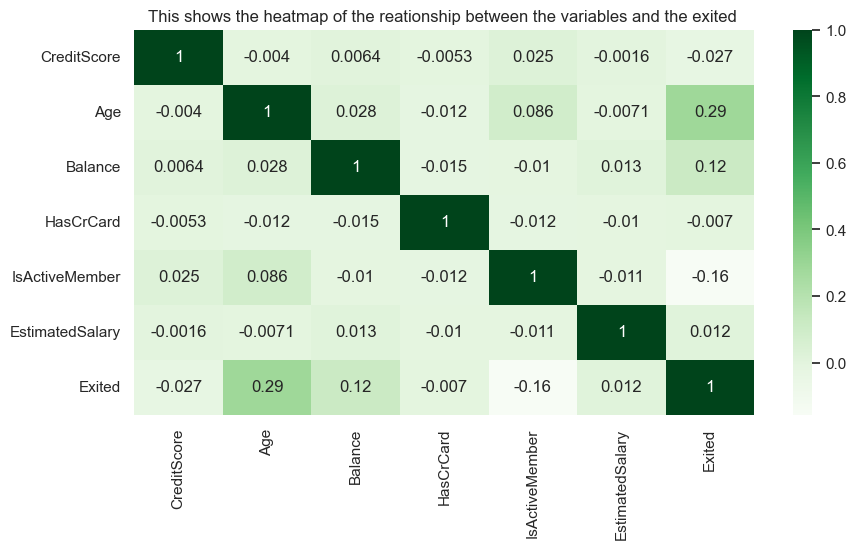

In [58]:
# The correlation between the variables and the target variable
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot= True, cmap = 'Greens')
plt.title('This shows the heatmap of the reationship between the variables and the exited ')
plt.show()

# Observations:

- From the above diagram. The Age and the balance distribution has the highest correlation on the target variable( exited).
- while some other numerical features(like Hascreditcard, isactive, estimated salary has low correlstion with the Target variable(exited)

# Conclusions:

- If customers are not actively participating in the purchase of the services your rendering, there is likelihood of churn.
- If there is a bias in the purchase of debit card, there will also be a likelihood of churn.
- If the customers don’t frequently use product or service and do not have it firmly embedded in their workflow (so it becomes a habit) and their organisation, there is likelihood to see higher churn. Some customers will become dormant - that’s to be expected - but you should address that dormancy with messaging to get them re-engaged.
- If you take payments via credit or debit card, you are likely to experience involuntary churn, where the customer stops using the product or service because their card expires, is lost or stolen, reaches its credit limit, or a host of other reasons. Taking payments via Direct Debit.
- If your customers account balance is small, there is a likelihood of churn, but if there is no money in their wallet, there is higher likelihood of churn, they may just close the account and leave.
- Since Age and Balance has the heighest correlation on the target, we could say that the age and the balance can directly or indirectly affect the target varible(Exited).